In [1]:
#!pip install kaggle

In [2]:
#!kaggle datasets download -d salader/dogs-vs-cats

In [3]:
#!unzip dogs-vs-cats.zip


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory='E:/CNN Personal Practise/Dogs vs Cats/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)


Found 20000 files belonging to 2 classes.


In [6]:
validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    directory = 'E:/CNN Personal Practise/Dogs vs Cats/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)    
)

Found 5000 files belonging to 2 classes.


In [7]:
def normalise(image, label):
    image = tf.cast(image/255, tf.float32)
    return image, label

train_ds = train_ds.map(normalise)
validation_ds = validation_ds.map(normalise)

In [8]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 127, 127, 32)     128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(train_ds, epochs=6, validation_data=validation_ds)

Epoch 1/6
625/625 [==============================] - 518s 827ms/step - loss: 0.6959 - accuracy: 0.6156 - val_loss: 0.5880 - val_accuracy: 0.6760
Epoch 2/6
625/625 [==============================] - 520s 831ms/step - loss: 0.5510 - accuracy: 0.7183 - val_loss: 0.5326 - val_accuracy: 0.7210
Epoch 3/6
625/625 [==============================] - 517s 828ms/step - loss: 0.4709 - accuracy: 0.7779 - val_loss: 0.4496 - val_accuracy: 0.7908
Epoch 4/6
625/625 [==============================] - 512s 819ms/step - loss: 0.4115 - accuracy: 0.8155 - val_loss: 0.3948 - val_accuracy: 0.8188
Epoch 5/6
625/625 [==============================] - 512s 819ms/step - loss: 0.3519 - accuracy: 0.8476 - val_loss: 0.3833 - val_accuracy: 0.8268
Epoch 6/6
625/625 [==============================] - 512s 819ms/step - loss: 0.2918 - accuracy: 0.8775 - val_loss: 0.3586 - val_accuracy: 0.8488


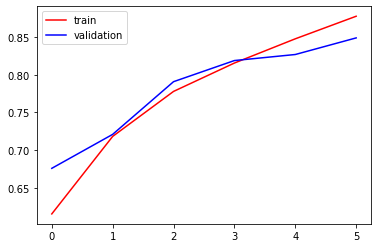

In [12]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

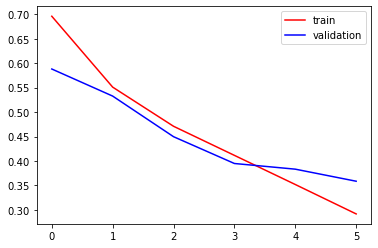

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [14]:
import cv2

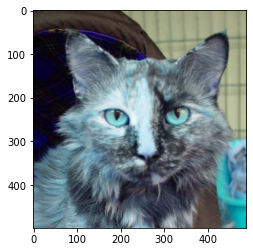

In [15]:
test_img1 = cv2.imread('E:/CNN Personal Practise/Dogs vs Cats/test/cats/cat.10.jpg')
plt.imshow(test_img1)

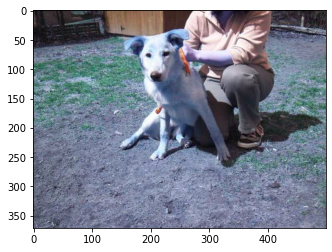

In [25]:
test_img2 = cv2.imread('E:/CNN Personal Practise/Dogs vs Cats/test/dogs/dog.22.jpg')
plt.imshow(test_img2)

In [17]:
test_img1.shape

(499, 489, 3)

In [26]:
test_img2.shape

(371, 499, 3)

In [27]:
test_img1 = cv2.resize(test_img1,(256,256))
test_img2 = cv2.resize(test_img2,(256,256))

In [28]:
test_input1 = test_img1.reshape((1,256,256,3))
test_input2 = test_img2.reshape((1,256,256,3))

In [22]:
model.predict(test_input1)

1/1 [==============================] - 2s 2s/step


array([[1.]], dtype=float32)

In [29]:
model.predict(test_input2)

1/1 [==============================] - 0s 32ms/step


array([[8.288083e-11]], dtype=float32)